# Principal Component Analysis with Cancer Data

In [132]:
#Import all the necessary modules

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy import stats
from sklearn.decomposition import PCA
from scipy.stats import zscore



# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [133]:
# Read the dataset


bcw_df = pd.read_csv("breast-cancer-wisconsin-data.csv")  

bcw_df.head(10)

ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   
5  1017122               8         10          10                  8   
6  1018099               1          1           1                  1   
7  1018561               2          1           2                  1   
8  1033078               2          1           1                  1   
9  1033078               4          2           1                  1   

   Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2           1                3                1   
1                            7          10                3                2   
2                            2           2                3                1   
3                            3           4                3                7   
4                            2           1                3                1   
5                            7          10                9                7   
6                            2          10                3                1   
7                            2           1                3                1   
8                            2           1                1                1   
9                            2           1                2                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2  
5        1      4  
6        1      2  
7        1      2  
8        5      2  
9        1      2

In [134]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
Class = bcw_df['Class']
bcw_df = bcw_df.drop('ID', axis=1)
bcw_df.head(10)

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0               5          1           1                  1   
1               5          4           4                  5   
2               3          1           1                  1   
3               6          8           8                  1   
4               4          1           1                  3   
5               8         10          10                  8   
6               1          1           1                  1   
7               2          1           2                  1   
8               2          1           1                  1   
9               4          2           1                  1   

   Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2           1                3                1   
1                            7          10                3                2   
2                            2           2                3                1   
3                            3           4                3                7   
4                            2           1                3                1   
5                            7          10                9                7   
6                            2          10                3                1   
7                            2           1                3                1   
8                            2           1                1                1   
9                            2           1                2                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2  
5        1      4  
6        1      2  
7        1      2  
8        5      2  
9        1      2

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [135]:
bcw_df.info()
bcw_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


(699, 10)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [136]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [137]:
nonzero_bcw_median = bcw_df.median()
bcw_df.loc[bcw_df['ClumpThickness'] ==0, "ClumpThickness"] = nonzero_bcw_median['ClumpThickness']
bcw_df.loc[bcw_df['Cell Size'] ==0, "Cell Size"] = nonzero_bcw_median['Cell Size']
bcw_df.loc[bcw_df['Cell Shape'] ==0, "Cell Shape"] = nonzero_bcw_median['Cell Shape']
bcw_df.loc[bcw_df['Marginal Adhesion'] ==0, "Marginal Adhesion"] = nonzero_bcw_median['Marginal Adhesion']
bcw_df.loc[bcw_df['Single Epithelial Cell Size'] ==0, "Single Epithelial Cell Size"] = nonzero_bcw_median['Single Epithelial Cell Size']
bcw_df.loc[bcw_df['Normal Nucleoli'] ==0, "Normal Nucleoli"] = nonzero_bcw_median['Normal Nucleoli']
bcw_df.loc[bcw_df['Bland Chromatin'] ==0, "Bland Chromatin"] = nonzero_bcw_median['Bland Chromatin']
bcw_df.loc[bcw_df['Mitoses'] ==0, "Mitoses"] = nonzero_bcw_median['Mitoses']

In [138]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [139]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [140]:
temp = pd.DataFrame(bcw_df['Bare Nuclei'].str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['Bare Nuclei'] == False]   # from temp take only those rows where hp has false
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"

Bare Nuclei
23         False
40         False
139        False
145        False
158        False
164        False
235        False
249        False
275        False
292        False
294        False
297        False
315        False
321        False
411        False
617        False

In [141]:
bcw_df = bcw_df.replace('?', np.nan)
bcw_df = bcw_df.apply(lambda x: x.fillna(x.median()),axis=0)

# converting the hp column from object / string type to float
bcw_df['Bare Nuclei'] = bcw_df['Bare Nuclei'].astype('float64') 

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [142]:
# Check for correlation of variable

In [143]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [144]:
#Let us check for pair plots

In [145]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [146]:
X = bcw_df[bcw_df.columns[1:-1]]
y = bcw_df["Class"]

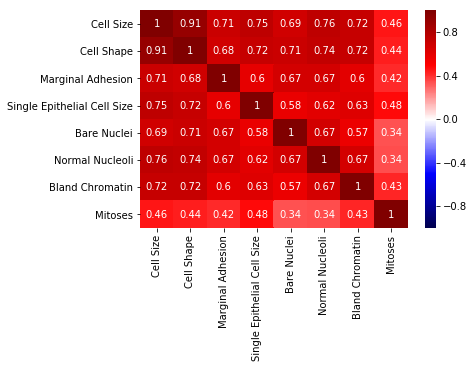

In [147]:
corr = X.corr()

sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


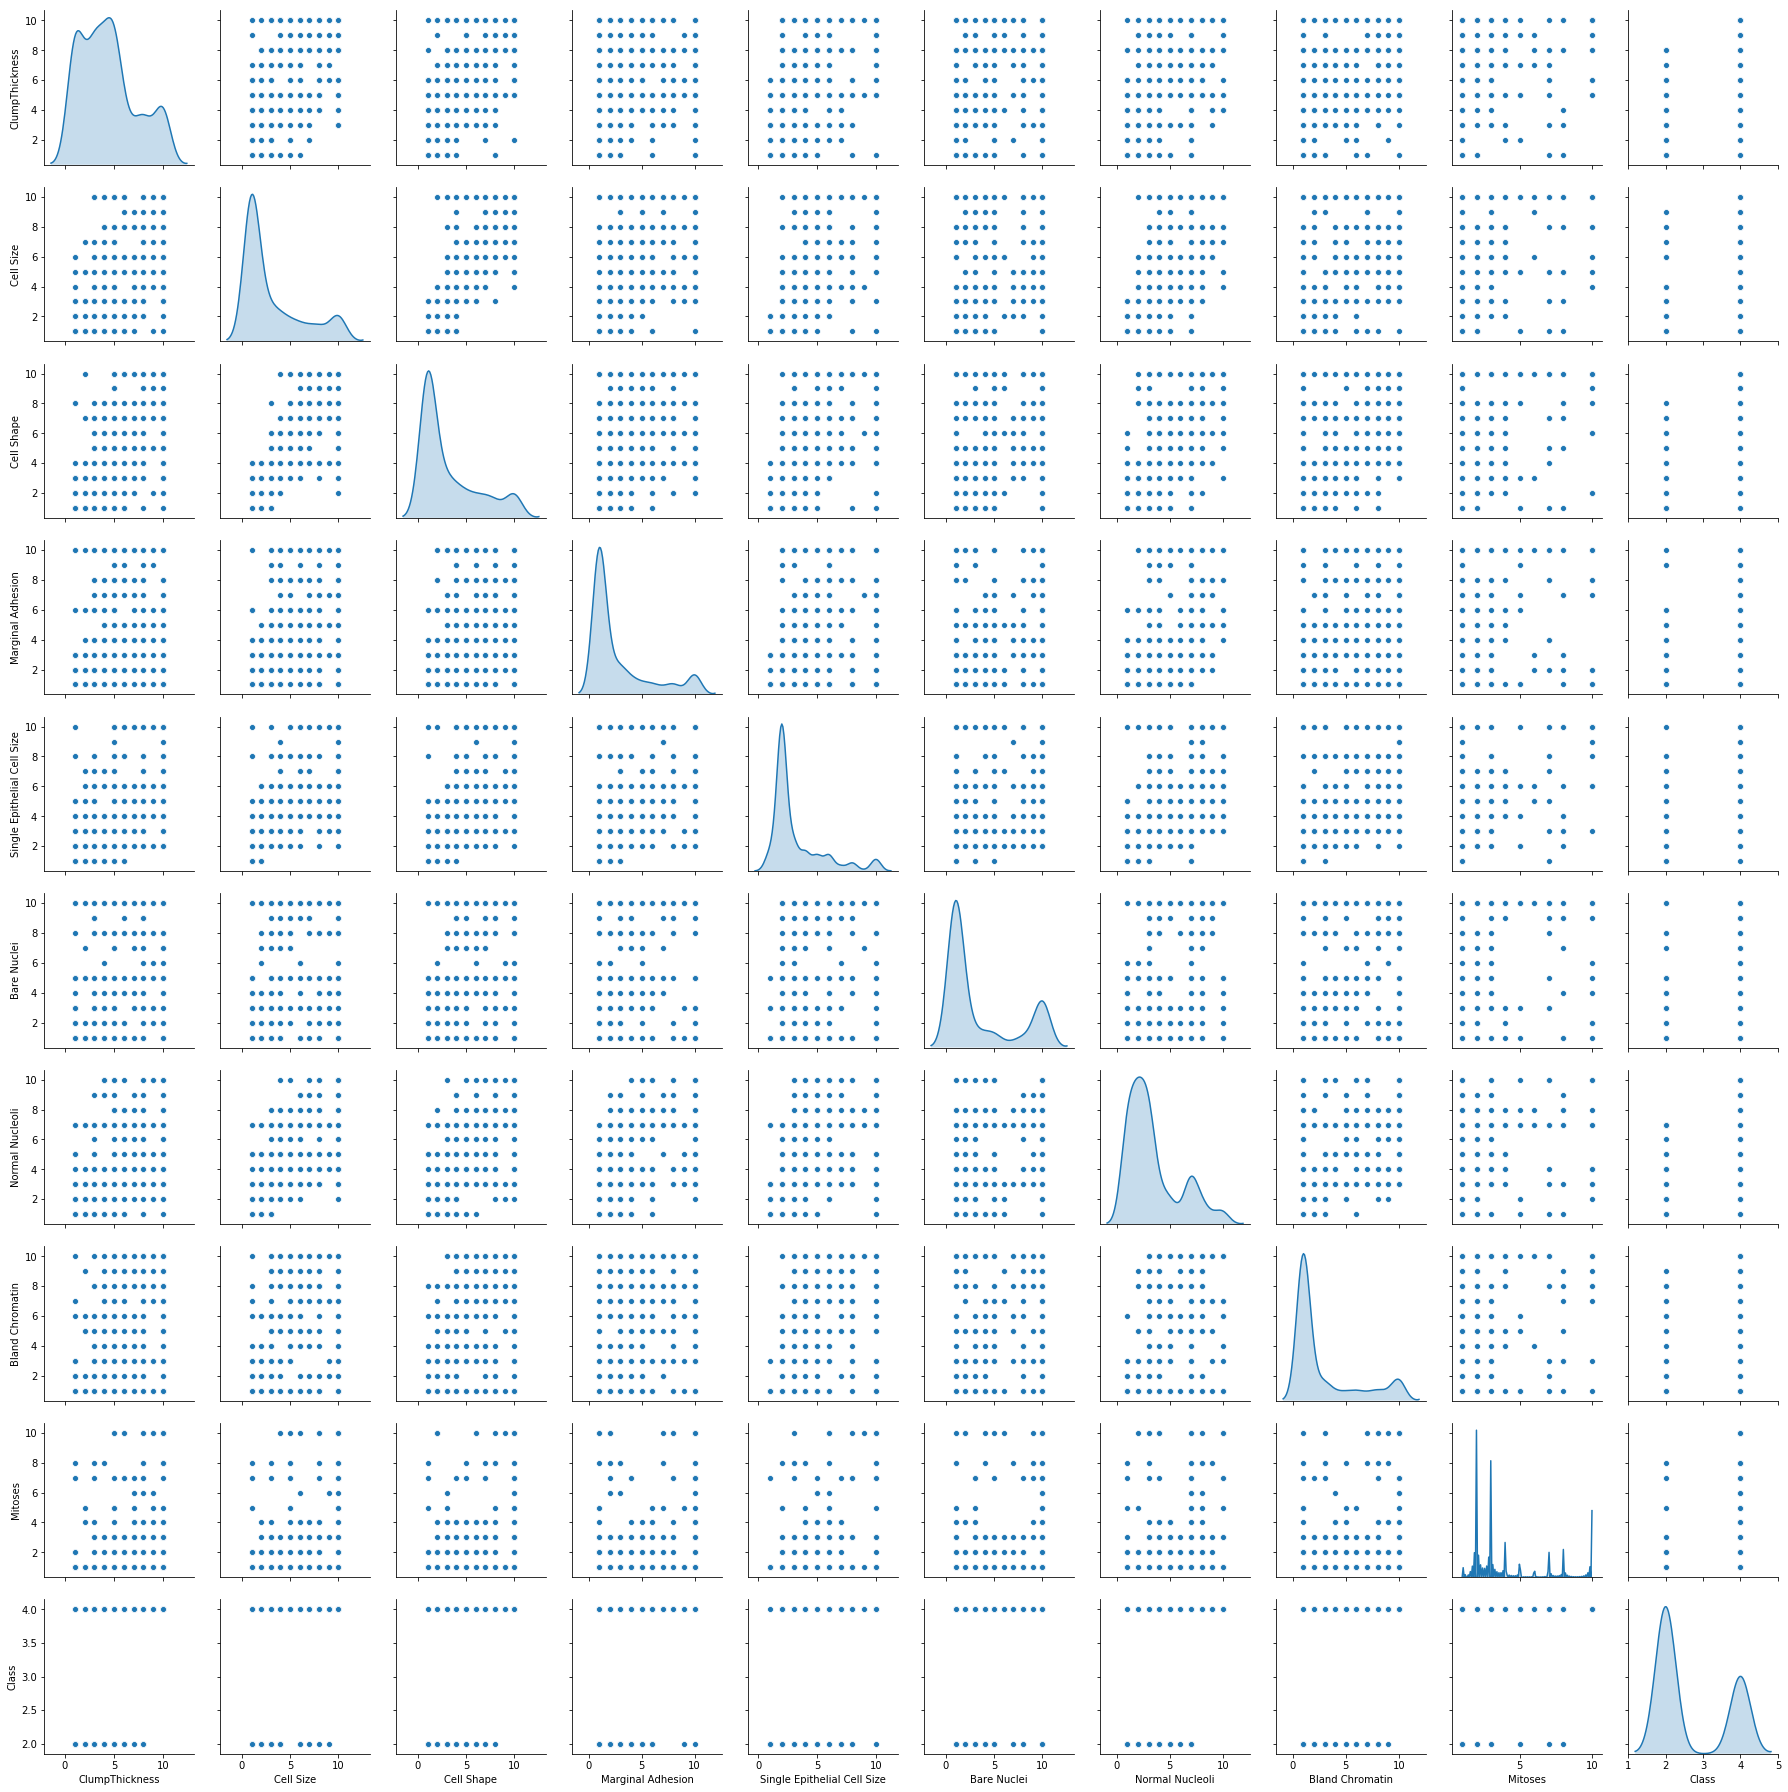

In [148]:
sns.pairplot(bcw_df, diag_kind='kde') 

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [149]:
from scipy import stats
newdata = bcw_df[(np.abs(stats.zscore(bcw_df)) < 2.698).all(axis=1)]
newdata.shape

(648, 10)

In [150]:
X = newdata[newdata.columns[1:-1]]
y = newdata["Class"]

# Q6 Create a covariance matrix for identifying Principal components

In [151]:
# PCA
# Step 1 - Create covariance matrix


In [152]:
sc = StandardScaler()         
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.0015456  0.90086598 0.69283943 0.73308212 0.67637148 0.74671627
  0.73094613 0.43155367]
 [0.90086598 1.0015456  0.67104351 0.70690496 0.68962935 0.73080354
  0.72309852 0.38961603]
 [0.69283943 0.67104351 1.0015456  0.59795509 0.68575821 0.6510195
  0.59378187 0.38750453]
 [0.73308212 0.70690496 0.59795509 1.0015456  0.59413265 0.62686014
  0.66848411 0.40724077]
 [0.67637148 0.68962935 0.68575821 0.59413265 1.0015456  0.65916743
  0.56133266 0.41411613]
 [0.74671627 0.73080354 0.6510195  0.62686014 0.65916743 1.0015456
  0.66758427 0.32865685]
 [0.73094613 0.72309852 0.59378187 0.66848411 0.56133266 0.66758427
  1.0015456  0.39706679]
 [0.43155367 0.38961603 0.38750453 0.40724077 0.41411613 0.32865685
  0.39706679 1.0015456 ]]


# Q7 Identify eigen values and eigen vector

In [153]:
# Step 2- Get eigen values and eigen vector

In [154]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.39751211  0.09927843  0.7315319   0.15591223  0.05254496 -0.22477271
  -0.46627867  0.04450647]
 [-0.39166555  0.15061393 -0.67108134  0.13169359  0.07603289 -0.30889211
  -0.49493771 -0.10030705]
 [-0.35211199  0.04269702 -0.04712266 -0.51150894 -0.14869859  0.69702573
  -0.27243928  0.16778817]
 [-0.35622047  0.01877496 -0.04831997  0.35769743 -0.77415335 -0.02582191
   0.29871666  0.23078209]
 [-0.35150436 -0.01168171  0.07388524 -0.58933111 -0.12272972 -0.37807569
   0.3365161  -0.50228591]
 [-0.36379798  0.2250308  -0.04702049 -0.07874852  0.49061292 -0.12962585
   0.43326936  0.60280484]
 [-0.35720521  0.06762119  0.0198977   0.46199125  0.30999911  0.45449729
   0.2700971  -0.52761757]
 [-0.23282289 -0.95390553 -0.04347046  0.04255496  0.13479713 -0.03520476
  -0.01575389  0.11180033]]

 Eigen Values 
%s [5.3508693  0.76914601 0.09662529 0.52122541 0.35554306 0.33316424
 0.30213215 0.2836593 ]


# Q8 Find variance and cumulative variance by each eigen vector

In [155]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


0         1         2         3         4         5         6  \
0  5.350869  0.769146  0.096625  0.521225  0.355543  0.333164  0.302132   

          7  
0  0.283659

In [156]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 66.78264732  76.38213549  82.8873986   87.32482835  91.48295463
  95.25377835  98.79404773 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [157]:
newX = PCA(n_components=7).fit_transform(X)
newX

array([[-4.00540474,  0.16440536,  0.0525561 , ..., -1.07720791,
         0.11791654,  0.04107592],
       [ 5.72804511, -4.9226224 , -0.43123661, ...,  1.75907516,
         3.31230291, -0.74643059],
       [-3.51481934, -0.5979838 , -0.35544143, ..., -1.00047141,
         0.09274609,  0.08326539],
       ...,
       [11.24358279,  7.99246108, -1.31183301, ..., -0.64143572,
         0.89526078, -0.33872216],
       [ 7.81922068,  3.360242  ,  0.52635763, ..., -4.33702914,
        -1.22858862,  1.44062158],
       [ 8.90861362,  1.93249749,  1.81194114, ..., -3.8789038 ,
        -0.69362672, -0.14125882]])

# Q10 Find correlation between components and features

In [158]:
principalDf = pd.DataFrame(data = newX
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7'])
finalDf = pd.concat([principalDf, newdata[['Class']]], axis = 1)

In [159]:
finalDf

principal component 1  principal component 2  principal component 3  \
0                -4.005405               0.164405               0.052556   
1                 5.728045              -4.922622              -0.431237   
2                -3.514819              -0.597984              -0.355441   
3                 5.755251               4.296679              -2.554750   
4                -3.296879              -0.178497               1.650660   
5                15.543896               0.335457               1.144563   
6                 0.409864              -6.697097              -3.619422   
7                -3.601016               0.375244               0.089469   
8                -4.398140              -0.009234              -0.099584   
9                -3.900849               0.340136               0.130316   
10               -4.214631               0.051223               0.068408   
11               -4.319217               0.090980               0.004056   
12                0.803806               0.833287              -0.045325   
13               -3.024234              -1.360373              -0.763439   
14               10.632247              -2.389276               3.188522   
15                2.258607               3.006634               2.161589   
16               -4.319217               0.090980               0.004056   
17               -4.005405               0.164405               0.052556   
18                7.908705              -4.501289               1.357883   
19               -4.005405               0.164405               0.052556   
20                7.431012              -5.521554               2.614730   
21                8.510379               2.463018              -3.778548   
22               -4.319217               0.090980               0.004056   
23                0.895963               3.077695              -0.063570   
24               -4.005405               0.164405               0.052556   
25                3.161688              -1.681538              -1.889579   
26               -4.110075               0.226954               0.146168   
27               -4.319217               0.090980               0.004056   
28               -4.319217               0.090980               0.004056   
29               -3.824253               0.439233               0.029382   
..                     ...                    ...                    ...   
667                    NaN                    NaN                    NaN   
668                    NaN                    NaN                    NaN   
669                    NaN                    NaN                    NaN   
670                    NaN                    NaN                    NaN   
671                    NaN                    NaN                    NaN   
672                    NaN                    NaN                    NaN   
673                    NaN                    NaN                    NaN   
674                    NaN                    NaN                    NaN   
675                    NaN                    NaN                    NaN   
676                    NaN                    NaN                    NaN   
677                    NaN                    NaN                    NaN   
678                    NaN                    NaN                    NaN   
679                    NaN                    NaN                    NaN   
681                    NaN                    NaN                    NaN   
682                    NaN                    NaN                    NaN   
683                    NaN                    NaN                    NaN   
684                    NaN                    NaN                    NaN   
685                    NaN                    NaN                    NaN   
686                    NaN                    NaN                    NaN   
687                    NaN                    NaN                    NaN   
688                    NaN                    NaN    

In [163]:
finalDf.corr()

principal component 1  principal component 2  \
principal component 1           1.000000e+00           9.001193e-17   
principal component 2           9.001193e-17           1.000000e+00   
principal component 3          -1.241062e-16           2.671576e-17   
principal component 4           1.246118e-16           2.388793e-16   
principal component 5          -3.638053e-16           1.532181e-16   
principal component 6           5.226723e-17           6.893120e-17   
principal component 7           3.808271e-17           2.708591e-16   
Class                           6.017743e-02           2.334742e-02   

                       principal component 3  principal component 4  \
principal component 1          -1.241062e-16           1.246118e-16   
principal component 2           2.671576e-17           2.388793e-16   
principal component 3           1.000000e+00          -5.450919e-16   
principal component 4          -5.450919e-16           1.000000e+00   
principal component 5          -4.948985e-16          -9.736880e-17   
principal component 6           4.669843e-16          -2.904291e-17   
principal component 7           1.813702e-16           1.705120e-17   
Class                          -2.740926e-02          -6.077506e-02   

                       principal component 5  principal component 6  \
principal component 1          -3.638053e-16           5.226723e-17   
principal component 2           1.532181e-16           6.893120e-17   
principal component 3          -4.948985e-16           4.669843e-16   
principal component 4          -9.736880e-17          -2.904291e-17   
principal component 5           1.000000e+00           2.560230e-17   
principal component 6           2.560230e-17           1.000000e+00   
principal component 7           1.519019e-16           4.069713e-18   
Class                          -1.613470e-02           9.108236e-02   

                       principal component 7     Class  
principal component 1           3.808271e-17  0.060177  
principal component 2           2.708591e-16  0.023347  
principal component 3           1.813702e-16 -0.027409  
principal component 4           1.705120e-17 -0.060775  
principal component 5           1.519019e-16 -0.016135  
principal component 6           4.069713e-18  0.091082  
principal component 7           1.000000e+00 -0.005773  
Class                          -5.772695e-03  1.000000